**Web scraping is, essentially, the practice of substituting a web browser for an application of your own design. Because of this, it’s important to understand the standards and frameworks that web browsers are built on. As a web scraper, you must both mimic and, at times, subvert the expected internet customs and practices.**

In [ ]:
from IPython.core.display import display, HTML

display(HTML("<style>pre {white-space: pre-wrap !important; word-break: break-word !important;} </style>"))


### Web Scraping Freestyle Tryout

urllib is a standard Python library and contains functions for requesting data across the web, handling cookies, and even changing metadata such as headers and your user agent. We will be using urllib extensively throughout the book, so I recommend you read the Python documentation for the library.

urlopen is used to open a remote object across a network and read it. Because it is a fairly generic function (it can read HTML files, image files, or any other file stream with ease), it will be used quite frequently.

In [ ]:
from urllib.request import urlopen

html = urlopen('http://pythonscraping.com/pages/page3.html')
print(html.read())

b'<html>\n<head>\n<style>\nimg{\n\twidth:75px;\n}\ntable{\n\twidth:50%;\n}\ntd{\n\tmargin:10px;\n\tpadding:10px;\n}\n.wrapper{\n\twidth:800px;\n}\n.excitingNote{\n\tfont-style:italic;\n\tfont-weight:bold;\n}\n</style>\n</head>\n<body>\n<div id="wrapper">\n<img src="../img/gifts/logo.jpg" style="float:left;">\n<h1>Totally Normal Gifts</h1>\n<div id="content">Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is\nhand-curated by well-paid, free-range Tibetan monks.<p>\nWe haven\'t figured out how to make online shopping carts yet, but you can send us a check to:<br>\n123 Main St.<br>\nAbuja, Nigeria\n</br>We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.</div>\n<table id="giftList">\n<tr><th>\nItem Title\n</th><th>\nDescription\n</th><th>\nCost\n</th><th>\nImage\n</th></tr>\n\n<tr id="gift1" class="gift"><td>\nVegetable Basket\n</td><td>\nThis vegetable basket is the perfe

In [ ]:
# from urllib.request import Request, urlopen

# url = 'https://www.zillow.com/tempe-az/'
# headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'}

# req = Request(url, headers=headers)
# html = urlopen(req).read()

# print(html.decode('utf-8'))  # Decode to string


In [ ]:
# import requests

# url = 'https://www.zillow.com/tempe-az/'
# headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'}

# response = requests.get(url, headers=headers)

# if response.status_code == 200:
#     print(response.text)
# else:
#     print(f"Failed to fetch page, status code: {response.status_code}")


In [ ]:
# !pip3 install selenium webdriver-manager

In [ ]:
# # Step 1: Install Chromium and ChromeDriver
# !apt update
# !apt install -y chromium-chromedriver

# # Step 2: Set up environment variables
# import os
# os.environ["CHROME_BINARY"] = "/usr/bin/chromium-browser"
# os.environ["PATH"] += os.pathsep + "/usr/bin/"

# # Step 3: Import Selenium and Set Up WebDriver
# from selenium import webdriver
# from selenium.webdriver.chrome.service import Service

# options = webdriver.ChromeOptions()
# options.binary_location = "/usr/bin/chromium-browser"
# options.add_argument("--headless")  # Run in headless mode
# options.add_argument("--no-sandbox")
# options.add_argument("--disable-dev-shm-usage")

# # Step 4: Correct WebDriver Path
# driver = webdriver.Chrome(service=Service("/usr/bin/chromedriver"), options=options)

# # Step 5: Open Zillow (or any website)
# driver.get("https://www.zillow.com")

# print(driver.page_source[:1000])  # Print first 1000 characters of the page source
# driver.quit()


In [ ]:
# !pip3 install httpx parsel loguru

In [ ]:
# !pip3 install httpx[http2]

In [ ]:
# import asyncio
# from typing import List
# import httpx
# import json
# from parsel import Selector

# client = httpx.AsyncClient(
#     # enable http2
#     http2=True,
#     # add basic browser like headers to prevent being blocked
#     headers={
#         "accept-language": "en-US,en;q=0.9",
#         "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36",
#         "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
#         "accept-language": "en-US;en;q=0.9",
#         "accept-encoding": "gzip, deflate, br",
#     },
# )

# async def scrape_properties(urls: List[str]):
#     """scrape zillow property pages for property data"""
#     to_scrape = [client.get(url) for url in urls]
#     results = []
#     for response in asyncio.as_completed(to_scrape):
#         response = await response
#         assert response.status_code == 200, "request has been blocked"
#         selector = Selector(response.text)
#         data = selector.css("script#__NEXT_DATA__::text").get()
#         if data:
#             # Option 1: some properties are located in NEXT DATA cache
#             data = json.loads(data)
#             property_data = json.loads(data["props"]["pageProps"]["componentProps"]["gdpClientCache"])
#             property_data = property_data[list(property_data)[0]]['property']
#         else:
#             # Option 2: other times it's in Apollo cache
#             data = selector.css("script#hdpApolloPreloadedData::text").get()
#             data = json.loads(json.loads(data)["apiCache"])
#             property_data = next(
#                 v["property"] for k, v in data.items() if "ForSale" in k
#             )
#         results.append(property_data)
#     return results

# async def run():
#     data = await scrape_properties(
#             ["https://www.zillow.com/homedetails/1625-E-13th-St-APT-3K-Brooklyn-NY-11229/245001606_zpid/"]
#         )
#     print(json.dumps(data, indent=2))
# if __name__ == "__main__":
#     asyncio.run(run())

BeautifulSoup tries to make sense of the nonsensical; it helps format and organize the messy web by fixing bad HTML and presenting us with easily traversable Python objects representing XML structures.

In [ ]:
!pip3 install bs4

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/page3.html')
# bs = BeautifulSoup(html.read(), 'html.parser')
bs = BeautifulSoup(html, 'html.parser')
print(bs.h1)

<h1>Totally Normal Gifts</h1>


In [ ]:
print(bs.html.body.h1)
print(bs.body.h1)
print(bs.html.h1)

<h1>Totally Normal Gifts</h1>
<h1>Totally Normal Gifts</h1>
<h1>Totally Normal Gifts</h1>


Another popular parser is lxml. lxml has some advantages over html.parser in that it is generally better at parsing “messy” or malformed HTML code. It is forgiving and fixes problems like unclosed tags, tags that are improperly nested, and missing head or body tags.

lxml is also somewhat faster than html.parser, although speed is not necessarily an advantage in web scraping, given that the speed of the network itself will almost always be your largest bottleneck.

Avoid Over-Optimizing Web Scraping Code
Elegant algorithms are lovely to behold, but when it comes to web scraping, they may not have a practical impact. A few microseconds of processing time will likely be dwarfed by the—sometimes actual—seconds of network latency that a network request takes.

Good web scraping code generally focuses on robust and easily readable implementations, rather than clever processing optimizations.

One of the disadvantages of lxml is that it needs to be installed separately and depends on third-party C libraries to function. This can cause problems for portability and ease of use, compared to html.parser.

In [ ]:
!pip3 install lxml

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/page3.html')
# bs = BeautifulSoup(html.read(), 'html.parser')
bs = BeautifulSoup(html, 'lxml')
print(bs.h1)

<h1>Totally Normal Gifts</h1>


Another popular HTML parser is html5lib. Like lxml, html5lib is an extremely forgiving parser that takes even more initiative with correcting broken HTML. It also depends on an external dependency and is slower than both lxml and html.parser. Despite this, it may be a good choice if you are working with messy or handwritten HTML sites.

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/page3.html')
# bs = BeautifulSoup(html.read(), 'html.parser')
bs = BeautifulSoup(html, 'html5lib')
print(bs.h1)

<h1>Totally Normal Gifts</h1>


Searching for tags by attributes, working with lists of tags, and navigating parse trees.

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/warandpeace.html')
bs = BeautifulSoup(html.read(), 'html.parser')

Using this BeautifulSoup object, you can use the find_all function to extract a Python list of proper nouns found by selecting only the text within tags.

.get_text() strips all tags from the document you are working with and returns a Unicode string containing the text only. For example, if you are working with a large block of text that contains many hyperlinks, paragraphs, and other tags, all those will be stripped away, and you’ll be left with a tagless block of text.

In [ ]:
nameList = bs.find_all(name='span', attrs={'class':['red','green']})
for name in nameList:
    print(name.get_text())

Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news.
Anna
Pavlovna Scherer
Empress Marya
Fedorovna
Prince Vasili Kuragin
Anna Pavlovna
St. Petersburg
If you have nothing better to do, Count [or Prince], and if the
prospect of spending an evening with a poor invalid is not too
terrible, I shall be very charmed to see you tonight between 7 and 10-
Annette Scherer.
Heavens! what a virulent attack!
the prince
Anna Pavlovna
First of all, dear friend, tell me how you are. Set your friend's
mind at rest,
Can one be well while suffering morally? Can one be calm in times
like these if one

In [ ]:
nameList = bs.find_all(string='the prince')
print(len(nameList))

7


In [ ]:
title = bs.find_all(id='title', class_='text') # Since 'class' method is reserved in Python, we use class_ in bs4
title

[]

The find_all function is responsible for finding tags based on their name and attributes. But what if you need to find a tag based on its location in a document? That’s where tree navigation comes in handy

In the BeautifulSoup library, as well as many other libraries, there is a distinction drawn between children and descendants: much like in a human family tree, children are always exactly one tag below a parent, whereas descendants can be at any level in the tree below a parent. For example, the tr tags are children of the table tag, whereas tr, th, td, img, and span are all descendants of the table tag (at least in our example page). All children are descendants, but not all descendants are children.

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/page3.html')
bs = BeautifulSoup(html, 'html.parser')

"""
This code prints the list of product rows in the giftList table, including the initial row of column labels.
If you were to write it using the descendants() function instead of the children() function, about two dozen tags would be found within the table and printed, including img tags, span tags, and individual td tags.
It’s definitely important to differentiate between children and descendants!
"""

for child in bs.find('table',{'id':'giftList'}).children:
    print(child)



<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>


<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>


<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>


<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>


The BeautifulSoup next_siblings() function makes it trivial to collect data from tables, especially ones with title rows

As a complement to next_siblings, the previous_siblings function often can be helpful if there is an easily selectable tag at the end of a list of sibling tags that you would like to get.

And, of course, there are the next_sibling and previous_sibling functions, which perform nearly the same function as next_siblings and previous_siblings, except they return a single tag rather than a list of them.

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/page3.html')
bs = BeautifulSoup(html, 'html.parser')

"""
The output of this code is to print all rows of products from the product table, except for the first title row. Why does the title row get skipped?
Objects cannot be siblings with themselves. Anytime you get siblings of an object, the object itself will not be included in the list.
As the name of the function implies, it calls next siblings only. If you were to select a row in the middle of the list, for example, and call next_siblings on it, only the subsequent siblings would be returned.
So, by selecting the title row and calling next_siblings, you can select all the rows in the table without selecting the title row itself.
"""

for sibling in bs.find('table', {'id':'giftList'}).tr.next_siblings:
    print(sibling)



<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>


<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>


<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>
</td></tr>


<tr class="gift" id="gift4"><td>
Dead Parrot
</td><td>
This is an ex-parr

When scraping pages, you will likely discover that you need to find parents of tags less frequently than you need to find their children or siblings. Typically, when you look at HTML pages with the goal of crawling them, you start by looking at the top layer of tags, and then figure out how to drill your way down into the exact piece of data that you want. Occasionally, however, you can find yourself in odd situations that require BeautifulSoup’s parent-finding functions, .parent and .parents.

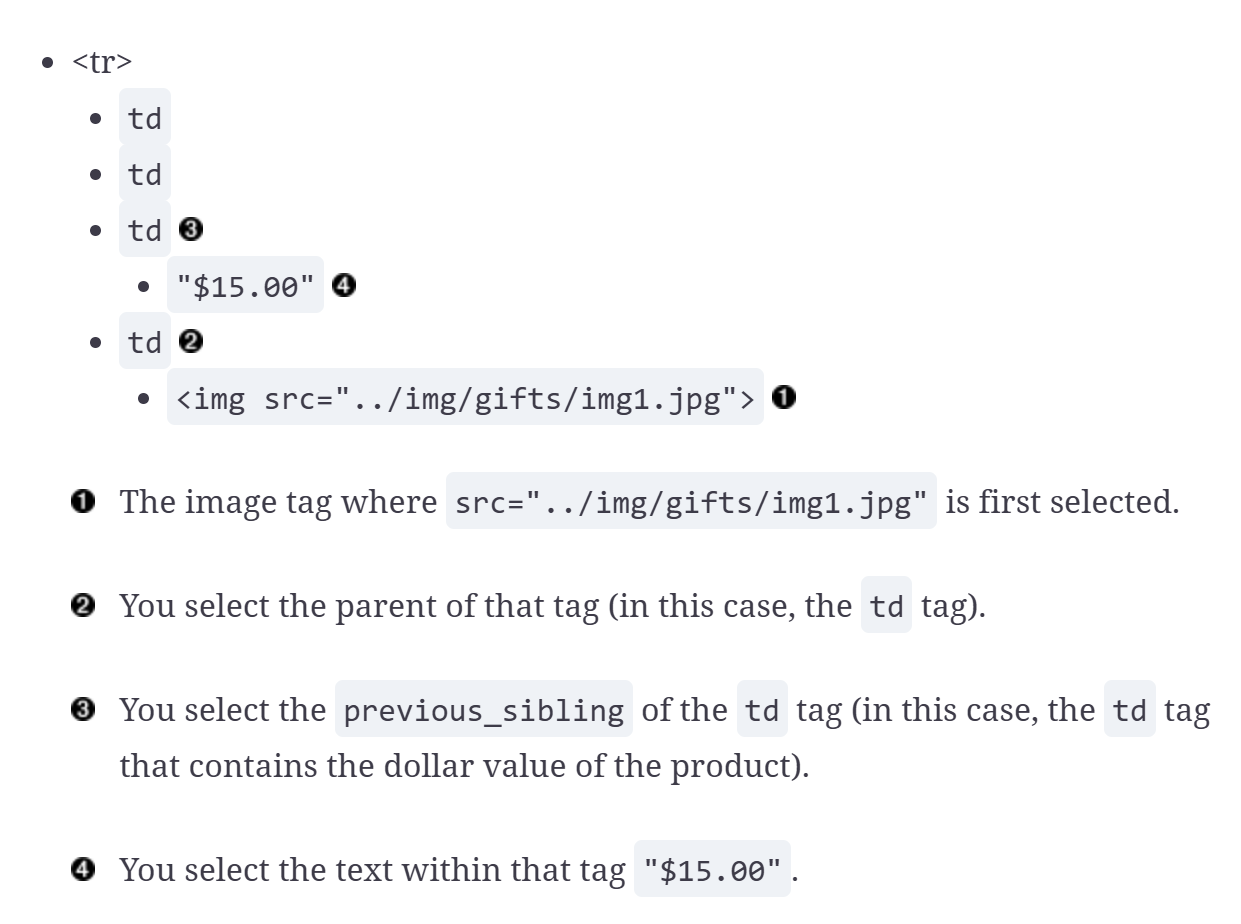

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/page3.html')
bs = BeautifulSoup(html, 'html.parser')
print(bs.find('img',
              {'src':'../img/gifts/img1.jpg'})
      .parent.previous_sibling.get_text())


$15.00



#### Regex

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

html = urlopen('http://www.pythonscraping.com/pages/page3.html')
bs = BeautifulSoup(html, 'html.parser')
images = bs.find_all('img',
    {'src':re.compile(r'..\/img\/gifts/img.*.jpg')})
for image in images:
    print(image['src'])

../img/gifts/img1.jpg
../img/gifts/img2.jpg
../img/gifts/img3.jpg
../img/gifts/img4.jpg
../img/gifts/img6.jpg


So far, you’ve looked at how to access and filter tags and access content within them. However, often in web scraping you’re not looking for the content of a tag; you’re looking for its attributes. This becomes especially useful for tags such as a, where the URL it is pointing to is contained within the href attribute; or the img tag, where the target image is contained within the src attribute.

In [ ]:
bs.img.attrs,bs.img.attrs['src'],bs.img.attrs['style']

({'src': '../img/gifts/logo.jpg', 'style': 'float:left;'},
 '../img/gifts/logo.jpg',
 'float:left;')

Lambda Expression

In [ ]:
bs.find_all(lambda tag: len(tag.attrs) == 2) # All the tags which have 2 attributes like <img src="../img/gifts/logo.jpg" style="float:left;"/> (src and style are 2 attributes of img tag)

[<img src="../img/gifts/logo.jpg" style="float:left;"/>,
 <tr class="gift" id="gift1"><td>
 Vegetable Basket
 </td><td>
 This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
 <span class="excitingNote">Now with super-colorful bell peppers!</span>
 </td><td>
 $15.00
 </td><td>
 <img src="../img/gifts/img1.jpg"/>
 </td></tr>,
 <tr class="gift" id="gift2"><td>
 Russian Nesting Dolls
 </td><td>
 Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
 </td><td>
 $10,000.52
 </td><td>
 <img src="../img/gifts/img2.jpg"/>
 </td></tr>,
 <tr class="gift" id="gift3"><td>
 Fish Painting
 </td><td>
 If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
 </td><td>
 $10,005.00
 </td><td>
 <img src="../img/gifts/img3.jpg"/>
 </td>

### Urllib

In [ ]:
from urllib.request import urlopen

In [ ]:
url = "https://quotes.toscrape.com/"

In [ ]:
resp = urlopen(url)

In [ ]:
resp

In [ ]:
resp.status

200

In [ ]:
content = resp.read()

In [ ]:
content # We get the byte string (Notice 'b' prefix in the beginning)

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n\t<meta charset="UTF-8">\n\t<title>Quotes to Scrape</title>\n    <link rel="stylesheet" href="/static/bootstrap.min.css">\n    <link rel="stylesheet" href="/static/main.css">\n    \n    \n</head>\n<body>\n    <div class="container">\n        <div class="row header-box">\n            <div class="col-md-8">\n                <h1>\n                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>\n                </h1>\n            </div>\n            <div class="col-md-4">\n                <p>\n                \n                    <a href="/login">Login</a>\n                \n                </p>\n            </div>\n        </div>\n    \n\n<div class="row">\n    <div class="col-md-8">\n\n    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">\n        <span class="text" itemprop="text">\xe2\x80\x9cThe world as we have created it is a process of our thinking. It cannot be changed without changing our thinki

In [ ]:
content.decode('utf-8') # content decoded to string

'<!DOCTYPE html>\n<html lang="en">\n<head>\n\t<meta charset="UTF-8">\n\t<title>Quotes to Scrape</title>\n    <link rel="stylesheet" href="/static/bootstrap.min.css">\n    <link rel="stylesheet" href="/static/main.css">\n    \n    \n</head>\n<body>\n    <div class="container">\n        <div class="row header-box">\n            <div class="col-md-8">\n                <h1>\n                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>\n                </h1>\n            </div>\n            <div class="col-md-4">\n                <p>\n                \n                    <a href="/login">Login</a>\n                \n                </p>\n            </div>\n        </div>\n    \n\n<div class="row">\n    <div class="col-md-8">\n\n    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">\n        <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>\

In [ ]:
print(content.decode('utf-8')) # To get indentation right

<!DOCTYPE html>
<html lang="en">
<head>
	<meta charset="UTF-8">
	<title>Quotes to Scrape</title>
    <link rel="stylesheet" href="/static/bootstrap.min.css">
    <link rel="stylesheet" href="/static/main.css">
    
    
</head>
<body>
    <div class="container">
        <div class="row header-box">
            <div class="col-md-8">
                <h1>
                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>
                </h1>
            </div>
            <div class="col-md-4">
                <p>
                
                    <a href="/login">Login</a>
                
                </p>
            </div>
        </div>
    

<div class="row">
    <div class="col-md-8">

    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">
        <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
        <span>by <small class="auth

In [ ]:
with urlopen(url) as resp:
   content = resp.read()
   print(content.decode('utf-8'))

<!DOCTYPE html>
<html lang="en">
<head>
	<meta charset="UTF-8">
	<title>Quotes to Scrape</title>
    <link rel="stylesheet" href="/static/bootstrap.min.css">
    <link rel="stylesheet" href="/static/main.css">
    
    
</head>
<body>
    <div class="container">
        <div class="row header-box">
            <div class="col-md-8">
                <h1>
                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>
                </h1>
            </div>
            <div class="col-md-4">
                <p>
                
                    <a href="/login">Login</a>
                
                </p>
            </div>
        </div>
    

<div class="row">
    <div class="col-md-8">

    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">
        <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
        <span>by <small class="auth

### Requests (Better than Urllib)

In [ ]:
# !pip3 install requests

In [ ]:
import requests

In [ ]:
resp = requests.get(url)

In [ ]:
resp

<Response [200]>

In [ ]:
resp.status_code

200

In [ ]:
resp.content # Byte String

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n\t<meta charset="UTF-8">\n\t<title>Quotes to Scrape</title>\n    <link rel="stylesheet" href="/static/bootstrap.min.css">\n    <link rel="stylesheet" href="/static/main.css">\n    \n    \n</head>\n<body>\n    <div class="container">\n        <div class="row header-box">\n            <div class="col-md-8">\n                <h1>\n                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>\n                </h1>\n            </div>\n            <div class="col-md-4">\n                <p>\n                \n                    <a href="/login">Login</a>\n                \n                </p>\n            </div>\n        </div>\n    \n\n<div class="row">\n    <div class="col-md-8">\n\n    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">\n        <span class="text" itemprop="text">\xe2\x80\x9cThe world as we have created it is a process of our thinking. It cannot be changed without changing our thinki

In [ ]:
print(resp.content.decode('utf-8'))

<!DOCTYPE html>
<html lang="en">
<head>
	<meta charset="UTF-8">
	<title>Quotes to Scrape</title>
    <link rel="stylesheet" href="/static/bootstrap.min.css">
    <link rel="stylesheet" href="/static/main.css">
    
    
</head>
<body>
    <div class="container">
        <div class="row header-box">
            <div class="col-md-8">
                <h1>
                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>
                </h1>
            </div>
            <div class="col-md-4">
                <p>
                
                    <a href="/login">Login</a>
                
                </p>
            </div>
        </div>
    

<div class="row">
    <div class="col-md-8">

    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">
        <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
        <span>by <small class="auth

In [ ]:
resp.text

'<!DOCTYPE html>\n<html lang="en">\n<head>\n\t<meta charset="UTF-8">\n\t<title>Quotes to Scrape</title>\n    <link rel="stylesheet" href="/static/bootstrap.min.css">\n    <link rel="stylesheet" href="/static/main.css">\n    \n    \n</head>\n<body>\n    <div class="container">\n        <div class="row header-box">\n            <div class="col-md-8">\n                <h1>\n                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>\n                </h1>\n            </div>\n            <div class="col-md-4">\n                <p>\n                \n                    <a href="/login">Login</a>\n                \n                </p>\n            </div>\n        </div>\n    \n\n<div class="row">\n    <div class="col-md-8">\n\n    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">\n        <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>\

In [ ]:
type(resp)

requests.models.Response

### Setting Headers

In [ ]:
resp.headers

{'Date': 'Fri, 21 Feb 2025 22:47:14 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Content-Length': '11064', 'Connection': 'keep-alive', 'Strict-Transport-Security': 'max-age=0; includeSubDomains; preload'}

In [ ]:
resp.headers['Content-Type'] # Keys are case insensitive

'text/html; charset=utf-8'

In [ ]:
resp = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})

In [ ]:
resp = requests.get("https://httpbin.org/headers")

In [ ]:
resp.json()

{'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, zstd',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.32.3',
  'X-Amzn-Trace-Id': 'Root=1-67b90272-193ca1a5126f1722468fa590'}}

In [ ]:
resp = requests.get("https://httpbin.org/headers", headers={"User-Agent": "Mozilla/5.0"})

In [ ]:
resp.json()

{'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, zstd',
  'Host': 'httpbin.org',
  'User-Agent': 'Mozilla/5.0',
  'X-Amzn-Trace-Id': 'Root=1-67b90272-56daabfd6d2dbb454b82ed56'}}

In [ ]:
resp.request.headers

{'User-Agent': 'Mozilla/5.0', 'Accept-Encoding': 'gzip, deflate, zstd', 'Accept': '*/*', 'Connection': 'keep-alive'}

### Query Parameters

Eg. books.com?author=JKRowling&title=HarryPotter&price=10

In [ ]:
url = "https://api.coinbase.com/v2/exchange-rates?currency=BTC"

In [ ]:
import requests as r

In [ ]:
resp = r.get(url)

In [ ]:
resp.json()

{'data': {'currency': 'BTC',
  'rates': {'00': '3471466.606170598914854679',
   '1INCH': '364338.6857142857120085975',
   'AAVE': '399.5205753096284459',
   'ABT': '107537.982796424350286946',
   'ACH': '2794294.04116693205557377',
   'ACS': '46859994.120385114770705327',
   'ACX': '317737.225913621263920063',
   'ADA': '125707.1024512884978001',
   'AED': '351281.0604722999968120365',
   'AERGO': '1053291.905286343611913485',
   'AERO': '126558.383728777674258348',
   'AFN': '7003106.4025230909165995085',
   'AGLD': '68600.154215830429653435',
   'AIOZ': '220696.6770508826571553935',
   'AKT': '54232.438332860783899218',
   'ALCX': '7807.2575510204091391725',
   'ALEO': '256061.325301204822477875',
   'ALEPH': '1144006.0406698564581861375',
   'ALGO': '364963.5036496350364964',
   'ALICE': '136237.7564102564101201725',
   'ALL': '9025921.026004744272679227',
   'AMD': '37715966.642220811286978448',
   'AMP': '18516728.944820909974624686',
   'ANG': '171817.7908735325811906315',
   'AN

In [ ]:
resp.json()['data']['rates']['USD']

'95638.905'

In [ ]:
url = "https://api.coinbase.com/v2/exchange-rates"
params = {'currency':'BTC'}

In [ ]:
resp = r.get(url, params=params)

In [ ]:
resp.json()['data']['rates']['USD']

'95638.905'

In [ ]:
url = "https://api.sunrisesunset.io/json"

In [ ]:
params = {
    "lat": 43.6532,
    "lng": -79.3832,
    "timezone": "EST",
    "date": "today"
}
headers={
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/133.0.0.0 Safari/537.36"
}

In [ ]:
resp = r.get(url, params=params, headers=headers)

In [ ]:
resp.request.url

'https://api.sunrisesunset.io/json?lat=43.6532&lng=-79.3832&timezone=EST&date=today'

In [ ]:
resp.json()

{'results': {'date': '2025-02-21',
  'sunrise': '7:09:53 AM',
  'sunset': '5:55:31 PM',
  'first_light': '5:34:08 AM',
  'last_light': '7:31:17 PM',
  'dawn': '6:40:43 AM',
  'dusk': '6:24:42 PM',
  'solar_noon': '12:32:42 PM',
  'golden_hour': '5:15:52 PM',
  'day_length': '10:45:38',
  'timezone': 'EST',
  'utc_offset': -300},
 'status': 'OK'}

### Authentication And Authorization

Authentication: Who we are

Authorization: What we can do, given who we are

In [ ]:
API_KEY = "YOUR_API_KEY_HERE"

In [ ]:
url = "https://api.exchange.coinbase.com/fills"

In [ ]:
headers = {
    "Authorization": f"Bearer {API_KEY}",
    "Content-Type": "application/json"
}

In [ ]:
# Not Authorized
r.get(url, headers=headers) # 500 Internal Servor Error since we don't actually have an API Key and are hence not authorized

<Response [500]>

In [ ]:
# Basic authentication
auth = ("user1","pass1")
url = "https://www.httpbin.org/basic-auth/user1/pass1"
r.get(url, auth=auth) # Password Matches

<Response [200]>

In [ ]:
auth = ("user1","pass1")
url = "https://www.httpbin.org/basic-auth/user1/pass2"
r.get(url, auth=auth) # Password doesn't match

<Response [401]>

### Aside From GET

In [ ]:
import requests as r

In [ ]:
r.delete("https://www.httpbin.org/delete").json()

{'args': {},
 'data': '',
 'files': {},
 'form': {},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, zstd',
  'Content-Length': '0',
  'Host': 'www.httpbin.org',
  'User-Agent': 'python-requests/2.32.3',
  'X-Amzn-Trace-Id': 'Root=1-67b90274-01c37a5e55f52de77400dd98'},
 'json': None,
 'origin': '35.239.32.21',
 'url': 'https://www.httpbin.org/delete'}

In [ ]:
r.patch("https://www.httpbin.org/patch").json()

{'args': {},
 'data': '',
 'files': {},
 'form': {},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, zstd',
  'Content-Length': '0',
  'Host': 'www.httpbin.org',
  'User-Agent': 'python-requests/2.32.3',
  'X-Amzn-Trace-Id': 'Root=1-67b90274-49bac96036272bf248ac6533'},
 'json': None,
 'origin': '35.239.32.21',
 'url': 'https://www.httpbin.org/patch'}

In [ ]:
r.put("https://www.httpbin.org/put").json()

{'args': {},
 'data': '',
 'files': {},
 'form': {},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, zstd',
  'Content-Length': '0',
  'Host': 'www.httpbin.org',
  'User-Agent': 'python-requests/2.32.3',
  'X-Amzn-Trace-Id': 'Root=1-67b90274-1e288ef24342e566239f2f3e'},
 'json': None,
 'origin': '35.239.32.21',
 'url': 'https://www.httpbin.org/put'}

In [ ]:
r.post("https://www.httpbin.org/post").json()

{'args': {},
 'data': '',
 'files': {},
 'form': {},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, zstd',
  'Content-Length': '0',
  'Host': 'www.httpbin.org',
  'User-Agent': 'python-requests/2.32.3',
  'X-Amzn-Trace-Id': 'Root=1-67b90275-1dccb3124adc88d8528a0bfb'},
 'json': None,
 'origin': '35.239.32.21',
 'url': 'https://www.httpbin.org/post'}

### POSTing Data

Client sends data to server via:

1. headers
2. query params
3. body

We have seen headers and query params. Now, we will see body

In [ ]:
resp = r.post("https://www.httpbin.org/post",
              data={
                  'key1':'value1',
                  'key2':'a value with spaces and apostrophe "'
                })
resp.json()

{'args': {},
 'data': '',
 'files': {},
 'form': {'key1': 'value1', 'key2': 'a value with spaces and apostrophe "'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, zstd',
  'Content-Length': '55',
  'Content-Type': 'application/x-www-form-urlencoded',
  'Host': 'www.httpbin.org',
  'User-Agent': 'python-requests/2.32.3',
  'X-Amzn-Trace-Id': 'Root=1-67b90275-6bc48cf14125d8c40aacae65'},
 'json': None,
 'origin': '35.239.32.21',
 'url': 'https://www.httpbin.org/post'}

In [ ]:
resp.request.body

'key1=value1&key2=a+value+with+spaces+and+apostrophe+%22'

In [ ]:
resp = r.post("https://www.httpbin.org/post",
              data="some text")
resp.json()

{'args': {},
 'data': 'some text',
 'files': {},
 'form': {},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, zstd',
  'Content-Length': '9',
  'Host': 'www.httpbin.org',
  'User-Agent': 'python-requests/2.32.3',
  'X-Amzn-Trace-Id': 'Root=1-67b90275-0178ea84596ef43b50e23eef'},
 'json': None,
 'origin': '35.239.32.21',
 'url': 'https://www.httpbin.org/post'}

In [ ]:
resp.request.body

'some text'

In [ ]:
resp = r.post("https://www.httpbin.org/post",
              json={
                  'key1':'value1',
                  'key2':'a value with spaces and apostrophe "'
                })
resp.json()

{'args': {},
 'data': '{"key1": "value1", "key2": "a value with spaces and apostrophe \\""}',
 'files': {},
 'form': {},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, zstd',
  'Content-Length': '67',
  'Content-Type': 'application/json',
  'Host': 'www.httpbin.org',
  'User-Agent': 'python-requests/2.32.3',
  'X-Amzn-Trace-Id': 'Root=1-67b90276-2bd17d123ce48b1179fc1e49'},
 'json': {'key1': 'value1', 'key2': 'a value with spaces and apostrophe "'},
 'origin': '35.239.32.21',
 'url': 'https://www.httpbin.org/post'}

In [ ]:
resp.request.body

b'{"key1": "value1", "key2": "a value with spaces and apostrophe \\""}'

### BeautifulSoup

In [ ]:
!pip3 install beautifulsoup4

In [ ]:
import requests as r

In [ ]:
resp = r.get("https://books.toscrape.com/")

In [ ]:
resp.content

b'<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->\n    <head>\n        <title>\n    All products | Books to Scrape - Sandbox\n</title>\n\n        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n        <meta name="created" content="24th Jun 2016 09:29" />\n        <meta name="description" content="" />\n        <meta name="viewport" content="width=device-width" />\n        <meta name="robots" content="NOARCHIVE,NOCACHE" />\n\n        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n        <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n\n        \n            <link rel="shortcut icon" hre

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
soup = BeautifulSoup(resp.content, "lxml")

In [ ]:
soup.title

<title>
    All products | Books to Scrape - Sandbox
</title>

In [ ]:
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <title>
   All products | Books to Scrape - Sandbox
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="24th Jun 2016 09:29" name="created"/>
  <meta content="" name="description"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="NOARCHIVE,NOCACHE" name="robots"/>
  <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
  <!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
  <link href="static/oscar/favicon.ico" rel="shortcut icon"/>
  <link href="static/oscar/css/styles.css" rel="stylesheet" type="tex

In [ ]:
soup.html

<html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link href="static/oscar/js/bootstrap-datetimepicker/bootstrap-datetimepicker.css" rel="stylesheet"/>
<link href="static/oscar/css/datetimepicker.css" rel="stylesheet" type="text/css"/>
</head>
<body class="default" id="default">
<header class="header container-fluid">
<div class="page_inner">
<div class

In [ ]:
soup.name

'[document]'

#### Tags

In [ ]:
soup.div

<div class="page_inner">
<div class="row">
<div class="col-sm-8 h1"><a href="index.html">Books to Scrape</a><small> We love being scraped!</small>
</div>
</div>
</div>

In [ ]:
first_div = soup.div
first_div

<div class="page_inner">
<div class="row">
<div class="col-sm-8 h1"><a href="index.html">Books to Scrape</a><small> We love being scraped!</small>
</div>
</div>
</div>

In [ ]:
type(first_div)

bs4.element.Tag

In [ ]:
first_div.attrs

{'class': ['page_inner']}

In [ ]:
first_div.div.div.attrs

{'class': ['col-sm-8', 'h1']}

In [ ]:
first_div.attrs['class'].append("some-other-class") # modifying attrs

In [ ]:
first_div # modified attrs

<div class="page_inner some-other-class">
<div class="row">
<div class="col-sm-8 h1"><a href="index.html">Books to Scrape</a><small> We love being scraped!</small>
</div>
</div>
</div>

In [ ]:
soup.div # attrs is changed here as well

<div class="page_inner some-other-class">
<div class="row">
<div class="col-sm-8 h1"><a href="index.html">Books to Scrape</a><small> We love being scraped!</small>
</div>
</div>
</div>

#### Parents, Children, And Descendants

In [ ]:
soup.ul

<ul class="breadcrumb">
<li>
<a href="index.html">Home</a>
</li>
<li class="active">All products</li>
</ul>

In [ ]:
print(soup.ul.prettify())

<ul class="breadcrumb">
 <li>
  <a href="index.html">
   Home
  </a>
 </li>
 <li class="active">
  All products
 </li>
</ul>



In [ ]:
soup.ul.children, next(soup.ul.children), list(soup.ul.children)

(<generator object Tag.children.<locals>.<genexpr> at 0x7e1b75c346c0>,
 '\n',
 ['\n',
  <li>
  <a href="index.html">Home</a>
  </li>,
  '\n',
  <li class="active">All products</li>,
  '\n'])

In [ ]:
from bs4.element import NavigableString
list(filter(lambda x: type(x) != NavigableString, soup.ul.children)) # To remove '\n' strings from children

[<li>
 <a href="index.html">Home</a>
 </li>,
 <li class="active">All products</li>]

In [ ]:
def no_nav_strings(iterable):
    return list(filter(lambda x: type(x) != NavigableString, iterable)) # To remove '\n' strings from children

In [ ]:
no_nav_strings(soup.ul.children)

[<li>
 <a href="index.html">Home</a>
 </li>,
 <li class="active">All products</li>]

In [ ]:
# Descendents
no_nav_strings(soup.ul.descendants)

[<li>
 <a href="index.html">Home</a>
 </li>,
 <a href="index.html">Home</a>,
 <li class="active">All products</li>]

In [ ]:
# parent
desc = no_nav_strings(soup.ul.descendants)
desc[0]

<li>
<a href="index.html">Home</a>
</li>

In [ ]:
desc[0].parent

<ul class="breadcrumb">
<li>
<a href="index.html">Home</a>
</li>
<li class="active">All products</li>
</ul>

#### Siblings

In [ ]:
soup.ul

<ul class="breadcrumb">
<li>
<a href="index.html">Home</a>
</li>
<li class="active">All products</li>
</ul>

In [ ]:
soup.ul.li

<li>
<a href="index.html">Home</a>
</li>

In [ ]:
soup.ul.li.next_sibling, soup.ul.li.next_sibling.next_sibling

('\n', <li class="active">All products</li>)

In [ ]:
list(soup.ul.li.next_siblings)

['\n', <li class="active">All products</li>, '\n']

In [ ]:
soup.ul.li\
    .next_sibling\
    .next_sibling\
    .previous_sibling\
    .previous_sibling

<li>
<a href="index.html">Home</a>
</li>

#### Extracting Text

In [ ]:
soup.a

<a href="index.html">Books to Scrape</a>

In [ ]:
soup.a.get_text()

'Books to Scrape'

In [ ]:
soup.a.text, soup.a.string

('Books to Scrape', 'Books to Scrape')

In [ ]:
soup.ul

<ul class="breadcrumb">
<li>
<a href="index.html">Home</a>
</li>
<li class="active">All products</li>
</ul>

In [ ]:
soup.ul.get_text(), soup.ul.text # Multiple text content of children

('\n\nHome\n\nAll products\n', '\n\nHome\n\nAll products\n')

In [ ]:
print(soup.ul.string) # Since ul itself doesn't haveany text, we will get 'None' as output

None


In [ ]:
print(soup.a.text, " of type ",type(soup.a.text))
print(soup.a.get_text(), " of type ",type(soup.a.get_text()))
print(soup.a.string, " of type ",type(soup.a.string))

Books to Scrape  of type  <class 'str'>
Books to Scrape  of type  <class 'str'>
Books to Scrape  of type  <class 'bs4.element.NavigableString'>


In [ ]:
soup.ul.get_text(separator=', ', strip=True)

'Home, All products'

#### All Strings

In [ ]:
soup.stripped_strings

<generator object PageElement.stripped_strings at 0x7e1b766be9b0>

In [ ]:
all_strings = list(soup.stripped_strings)

In [ ]:
all_strings

['All products | Books to Scrape - Sandbox',
 'Books to Scrape',
 'We love being scraped!',
 'Home',
 'All products',
 'Books',
 'Travel',
 'Mystery',
 'Historical Fiction',
 'Sequential Art',
 'Classics',
 'Philosophy',
 'Romance',
 'Womens Fiction',
 'Fiction',
 'Childrens',
 'Religion',
 'Nonfiction',
 'Music',
 'Default',
 'Science Fiction',
 'Sports and Games',
 'Add a comment',
 'Fantasy',
 'New Adult',
 'Young Adult',
 'Science',
 'Poetry',
 'Paranormal',
 'Art',
 'Psychology',
 'Autobiography',
 'Parenting',
 'Adult Fiction',
 'Humor',
 'Horror',
 'History',
 'Food and Drink',
 'Christian Fiction',
 'Business',
 'Biography',
 'Thriller',
 'Contemporary',
 'Spirituality',
 'Academic',
 'Self Help',
 'Historical',
 'Christian',
 'Suspense',
 'Short Stories',
 'Novels',
 'Health',
 'Politics',
 'Cultural',
 'Erotica',
 'Crime',
 'All products',
 '1000',
 'results - showing',
 '1',
 'to',
 '20',
 '.',
 'Warning!',
 'This is a demo website for web scraping purposes. Prices and ratin

In [ ]:
all_strings_unstripped = list(soup.strings)
all_strings_unstripped

[' ',
 '\n',
 '\n',
 '\n    All products | Books to Scrape - Sandbox\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 'Books to Scrape',
 ' We love being scraped!',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 'Home',
 '\n',
 '\n',
 'All products',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n                            \n                                Books\n                            \n                        ',
 '\n',
 '\n',
 '\n',
 '\n                            \n                                Travel\n                            \n                        ',
 '\n',
 '\n',
 '\n',
 '\n                            \n                                Mystery\n                            \n                        ',
 '\n',
 '\n',
 '\n',
 '\n                            \n                                Historical Fiction\n                            \n                      

In [ ]:
len(all_strings_unstripped), len(all_strings)

(847, 147)

#### Search

- find() -> like find_all(), but returns only 1st result

- find_all()

In [ ]:
len(soup.find_all())

541

In [ ]:
soup.find_all('a')

[<a href="index.html">Books to Scrape</a>,
 <a href="index.html">Home</a>,
 <a href="catalogue/category/books_1/index.html">
                             
                                 Books
                             
                         </a>,
 <a href="catalogue/category/books/travel_2/index.html">
                             
                                 Travel
                             
                         </a>,
 <a href="catalogue/category/books/mystery_3/index.html">
                             
                                 Mystery
                             
                         </a>,
 <a href="catalogue/category/books/historical-fiction_4/index.html">
                             
                                 Historical Fiction
                             
                         </a>,
 <a href="catalogue/category/books/sequential-art_5/index.html">
                             
                                 Sequential Art
            

In [ ]:
len(soup.find_all('a'))

94

In [ ]:
soup.find_all(['a','p'])

[<a href="index.html">Books to Scrape</a>,
 <a href="index.html">Home</a>,
 <a href="catalogue/category/books_1/index.html">
                             
                                 Books
                             
                         </a>,
 <a href="catalogue/category/books/travel_2/index.html">
                             
                                 Travel
                             
                         </a>,
 <a href="catalogue/category/books/mystery_3/index.html">
                             
                                 Mystery
                             
                         </a>,
 <a href="catalogue/category/books/historical-fiction_4/index.html">
                             
                                 Historical Fiction
                             
                         </a>,
 <a href="catalogue/category/books/sequential-art_5/index.html">
                             
                                 Sequential Art
            

In [ ]:
len(soup.find_all(['a','p']))

154

In [ ]:
soup.find_all('p', attrs={'class':'price_color'})

[<p class="price_color">£51.77</p>,
 <p class="price_color">£53.74</p>,
 <p class="price_color">£50.10</p>,
 <p class="price_color">£47.82</p>,
 <p class="price_color">£54.23</p>,
 <p class="price_color">£22.65</p>,
 <p class="price_color">£33.34</p>,
 <p class="price_color">£17.93</p>,
 <p class="price_color">£22.60</p>,
 <p class="price_color">£52.15</p>,
 <p class="price_color">£13.99</p>,
 <p class="price_color">£20.66</p>,
 <p class="price_color">£17.46</p>,
 <p class="price_color">£52.29</p>,
 <p class="price_color">£35.02</p>,
 <p class="price_color">£57.25</p>,
 <p class="price_color">£23.88</p>,
 <p class="price_color">£37.59</p>,
 <p class="price_color">£51.33</p>,
 <p class="price_color">£45.17</p>]

In [ ]:
price_tags = soup.find_all('p', attrs={'class':'price_color'})
[price.get_text() for price in price_tags]

['£51.77',
 '£53.74',
 '£50.10',
 '£47.82',
 '£54.23',
 '£22.65',
 '£33.34',
 '£17.93',
 '£22.60',
 '£52.15',
 '£13.99',
 '£20.66',
 '£17.46',
 '£52.29',
 '£35.02',
 '£57.25',
 '£23.88',
 '£37.59',
 '£51.33',
 '£45.17']

In [ ]:
price_tags = soup.find_all('p', class_='price_color')
price_tags

[<p class="price_color">£51.77</p>,
 <p class="price_color">£53.74</p>,
 <p class="price_color">£50.10</p>,
 <p class="price_color">£47.82</p>,
 <p class="price_color">£54.23</p>,
 <p class="price_color">£22.65</p>,
 <p class="price_color">£33.34</p>,
 <p class="price_color">£17.93</p>,
 <p class="price_color">£22.60</p>,
 <p class="price_color">£52.15</p>,
 <p class="price_color">£13.99</p>,
 <p class="price_color">£20.66</p>,
 <p class="price_color">£17.46</p>,
 <p class="price_color">£52.29</p>,
 <p class="price_color">£35.02</p>,
 <p class="price_color">£57.25</p>,
 <p class="price_color">£23.88</p>,
 <p class="price_color">£37.59</p>,
 <p class="price_color">£51.33</p>,
 <p class="price_color">£45.17</p>]

In [ ]:
add_buttons = soup.find_all('button',
                            attrs={'data-loading-text':'Adding...'})
add_buttons, len(add_buttons)

([<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>,
  <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>,
  <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>,
  <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>,
  <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>,
  <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>,
  <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>,
  <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>,
  <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</b

In [ ]:
add_remove_buttons = soup.find_all('button',
                            attrs={'data-loading-text':lambda x: 'add' in x.lower() or 'remove' in x.lower()})
add_remove_buttons, len(add_remove_buttons)

([<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>,
  <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>,
  <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>,
  <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>,
  <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>,
  <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>,
  <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>,
  <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>,
  <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</b

### Challenge

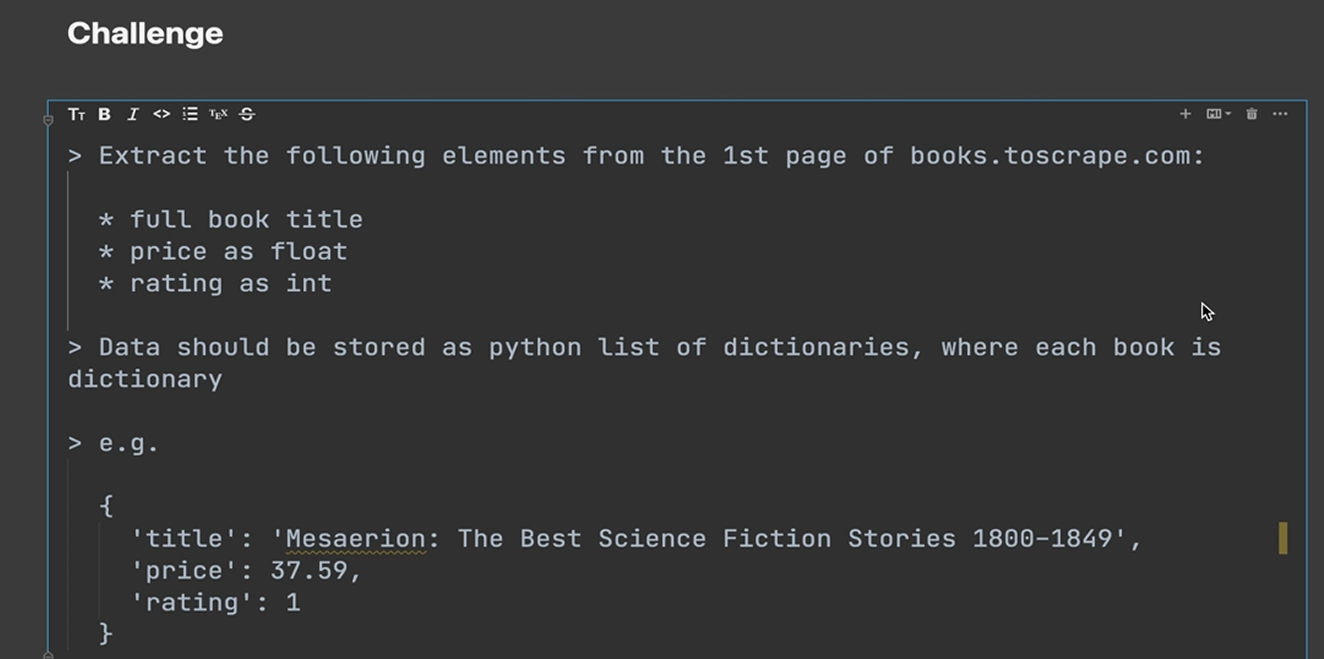

In [ ]:
import requests as r
from bs4 import BeautifulSoup

In [ ]:
resp = r.get("https://books.toscrape.com/")

In [ ]:
soup = BeautifulSoup(resp.content)

In [ ]:
book_tags = soup.find_all('article', attrs={'class':'product_pod'})

In [ ]:
import re
def clean_price(price):
    # return float("".join([char for char in price if char.isdigit() or char == '.'])) # Approach 1
    return float(re.sub('[^0-9.]',"",price)) # Approach 2

In [ ]:
def extract_book_data(book_tag):
    title = book_tag.find('h3').find('a')['title']
    price = book_tag.find('p', attrs={'class':'price_color'}).get_text()
    rating = book_tag.find('p', attrs={'class':'star-rating'})['class'][-1]

    return {'title':title, 'price':clean_price(price), 'rating':rating}

In [ ]:
# print(book_tags[0].prettify())

In [ ]:
book_data = [extract_book_data(book_tag) for book_tag in book_tags]

In [ ]:
book_data

[{'title': 'A Light in the Attic', 'price': 51.77, 'rating': 'Three'},
 {'title': 'Tipping the Velvet', 'price': 53.74, 'rating': 'One'},
 {'title': 'Soumission', 'price': 50.1, 'rating': 'One'},
 {'title': 'Sharp Objects', 'price': 47.82, 'rating': 'Four'},
 {'title': 'Sapiens: A Brief History of Humankind',
  'price': 54.23,
  'rating': 'Five'},
 {'title': 'The Requiem Red', 'price': 22.65, 'rating': 'One'},
 {'title': 'The Dirty Little Secrets of Getting Your Dream Job',
  'price': 33.34,
  'rating': 'Four'},
 {'title': 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'price': 17.93,
  'rating': 'Three'},
 {'title': 'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  'price': 22.6,
  'rating': 'Four'},
 {'title': 'The Black Maria', 'price': 52.15, 'rating': 'One'},
 {'title': 'Starving Hearts (Triangular Trade Trilogy, #1)',
  'price': 13.99,
  'rating': 'Two'},
 {'title': "Shakespeare's Sonn

### Functional Search Patterns

In [ ]:
soup.find_all(id='messages'), soup.find_all(attrs={'id':'messages'})

([<div id="messages">
  </div>],
 [<div id="messages">
  </div>])

In [ ]:
soup.find_all(attrs={'id': lambda x: x is not None})

[<body class="default" id="default">
 <header class="header container-fluid">
 <div class="page_inner">
 <div class="row">
 <div class="col-sm-8 h1"><a href="index.html">Books to Scrape</a><small> We love being scraped!</small>
 </div>
 </div>
 </div>
 </header>
 <div class="container-fluid page">
 <div class="page_inner">
 <ul class="breadcrumb">
 <li>
 <a href="index.html">Home</a>
 </li>
 <li class="active">All products</li>
 </ul>
 <div class="row">
 <aside class="sidebar col-sm-4 col-md-3">
 <div id="promotions_left">
 </div>
 <div class="side_categories">
 <ul class="nav nav-list">
 <li>
 <a href="catalogue/category/books_1/index.html">
                             
                                 Books
                             
                         </a>
 <ul>
 <li>
 <a href="catalogue/category/books/travel_2/index.html">
                             
                                 Travel
                             
                         </a>
 </li>
 <li>
 <a href

In [ ]:
def fiction_category_anchor(tag):
    return tag.name == 'a' and 'category' in tag['href'] and 'Fiction' in tag.text

In [ ]:
soup.find_all(fiction_category_anchor)

[<a href="catalogue/category/books/historical-fiction_4/index.html">
                             
                                 Historical Fiction
                             
                         </a>,
 <a href="catalogue/category/books/womens-fiction_9/index.html">
                             
                                 Womens Fiction
                             
                         </a>,
 <a href="catalogue/category/books/fiction_10/index.html">
                             
                                 Fiction
                             
                         </a>,
 <a href="catalogue/category/books/science-fiction_16/index.html">
                             
                                 Science Fiction
                             
                         </a>,
 <a href="catalogue/category/books/adult-fiction_29/index.html">
                             
                                 Adult Fiction
                             
              

### Text Search

In [ ]:
soup.find_all(string='Fiction') # Find tags that contains the word 'Fiction'

[]

In [ ]:
import re
fiction_regex_pattern = re.compile('Fiction', re.I) # re.I means case insensitive (IGNORECASE)

In [ ]:
soup.find_all(string=fiction_regex_pattern)

['\n                            \n                                Historical Fiction\n                            \n                        ',
 '\n                            \n                                Womens Fiction\n                            \n                        ',
 '\n                            \n                                Fiction\n                            \n                        ',
 '\n                            \n                                Nonfiction\n                            \n                        ',
 '\n                            \n                                Science Fiction\n                            \n                        ',
 '\n                            \n                                Adult Fiction\n                            \n                        ',
 '\n                            \n                                Christian Fiction\n                            \n                        ']

In [ ]:
text_matches = soup.find_all(string=fiction_regex_pattern)
[text.strip() for text in text_matches]

['Historical Fiction',
 'Womens Fiction',
 'Fiction',
 'Nonfiction',
 'Science Fiction',
 'Adult Fiction',
 'Christian Fiction']

### Searching By CSS

In [ ]:
title_tags = soup.select('article.product_pod > h3 > a') # '>' is child combinator in CSS
titles = [tag['title'] for tag in title_tags]
titles

['A Light in the Attic',
 'Tipping the Velvet',
 'Soumission',
 'Sharp Objects',
 'Sapiens: A Brief History of Humankind',
 'The Requiem Red',
 'The Dirty Little Secrets of Getting Your Dream Job',
 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
 'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
 'The Black Maria',
 'Starving Hearts (Triangular Trade Trilogy, #1)',
 "Shakespeare's Sonnets",
 'Set Me Free',
 "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
 'Rip it Up and Start Again',
 'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
 'Olio',
 'Mesaerion: The Best Science Fiction Stories 1800-1849',
 'Libertarianism for Beginners',
 "It's Only the Himalayas"]

In [ ]:
soup.select('[title]') # All the elements that have a title attribute

[<a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a>,
 <a href="catalogue/tipping-the-velvet_999/index.html" title="Tipping the Velvet">Tipping the Velvet</a>,
 <a href="catalogue/soumission_998/index.html" title="Soumission">Soumission</a>,
 <a href="catalogue/sharp-objects_997/index.html" title="Sharp Objects">Sharp Objects</a>,
 <a href="catalogue/sapiens-a-brief-history-of-humankind_996/index.html" title="Sapiens: A Brief History of Humankind">Sapiens: A Brief History ...</a>,
 <a href="catalogue/the-requiem-red_995/index.html" title="The Requiem Red">The Requiem Red</a>,
 <a href="catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html" title="The Dirty Little Secrets of Getting Your Dream Job">The Dirty Little Secrets ...</a>,
 <a href="catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html" title="The Coming Woman: A Novel Based on the Life of the 

In [ ]:
soup.select('[title*=Human]') # All the elements that have a title attribute and that title contains word 'Human'

[<a href="catalogue/sapiens-a-brief-history-of-humankind_996/index.html" title="Sapiens: A Brief History of Humankind">Sapiens: A Brief History ...</a>]

In [ ]:
soup.select('button.btn-primary[data-loading-text][class*=primary]')

[<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>,
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>,
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>,
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>,
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>,
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>,
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>,
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>,
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>,
 

### Just One Tag

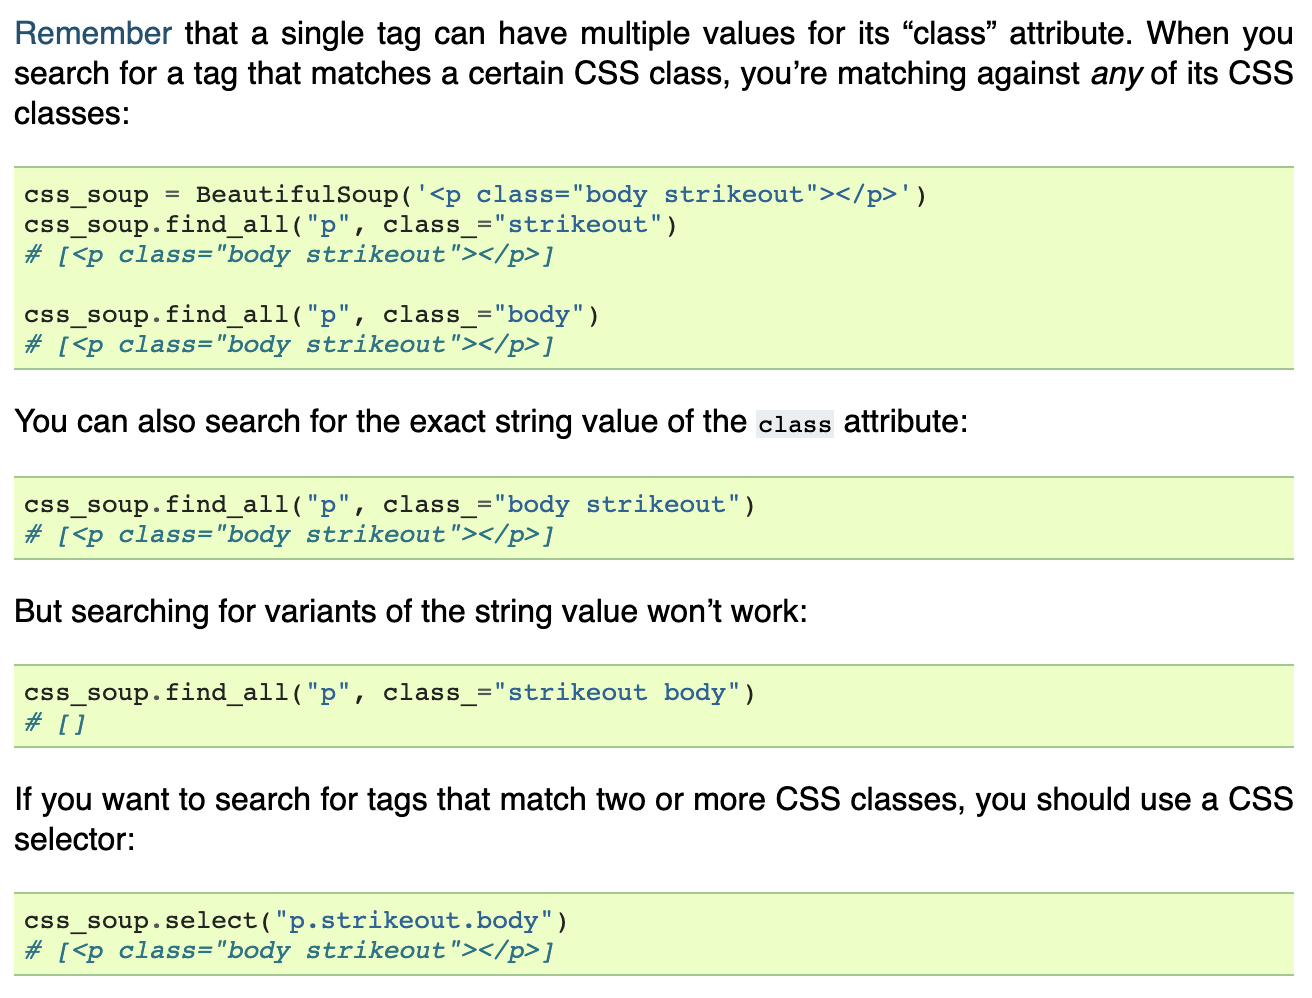

In [ ]:
soup.find_all('a', limit=1)[0] is soup.find('a')

True

In [ ]:
soup.select('a',limit=1)[0] is soup.select_one('a')

True

### Google Finance Project

In [ ]:
!pip3 install tabulate

In [ ]:
import requests as r
from bs4 import BeautifulSoup

In [ ]:
def get_fx_to_usd(currency):
    fx_url = f"https://www.google.com/finance/quote/{currency}-USD"
    resp = r.get(fx_url)
    soup = BeautifulSoup(resp.content, "lxml")

    fx_rate = soup.find('div',attrs={'data-last-price':True})
    fx = float(fx_rate['data-last-price'])
    return fx


In [ ]:
def get_price_information(ticker, exchange):
    url = f"https://www.google.com/finance/quote/{ticker}:{exchange}"
    resp = r.get(url)
    soup = BeautifulSoup(resp.content, "lxml")

    price_div = soup.find('div',attrs={'data-last-price':True})
    price = float(price_div['data-last-price'])
    currency = price_div['data-currency-code']
    usd_price = price

    if currency != "USD":
        usd_price = get_fx_to_usd(currency) * price

    return {
        'ticker':ticker,
        'exchange':exchange,
        'price':price,
        'currency':currency,
        'usd_price':usd_price
    }

In [ ]:
from dataclasses import dataclass

@dataclass
class Stock:
    ticker: str
    exchange: str
    price: float = 0
    currency: str = 'USD'
    usd_price: float = 0

    def __post_init__(self):
        price_info = get_price_information(self.ticker, self.exchange)

        self.price = price_info['price']
        self.currency = price_info['currency']
        self.usd_price = price_info['usd_price']


@dataclass
class Position:
    stock: Stock
    quantity: int


@dataclass
class Portfolio:
    positions: list[Position]

    def get_total_value(self):
        total_value = 0

        for position in self.positions:
            total_value += position.quantity * position.stock.usd_price

        return total_value

In [ ]:
from tabulate import tabulate
def display_portfolio_summary(portfolio):
    portfolio_value = portfolio.get_total_value()

    position_data = []

    for position in sorted(portfolio.positions,
                           key = lambda x: x.quantity * x.stock.usd_price,
                           reverse=True):
        position_data.append([
            position.stock.ticker,
            position.stock.exchange,
            position.quantity,
            position.stock.usd_price,
            position.quantity * position.stock.usd_price,
            position.quantity * position.stock.usd_price / portfolio_value * 100
        ])

    print(tabulate(position_data,
                   headers=['Ticker','Exchange','Quantity','Price','Market Value','% Allocation'],
                   tablefmt='psql',
                   floatfmt='.2f'
                   ))
    print(f'Total portfolio data: ${portfolio_value:,.2f}.')

In [ ]:
# print(get_price_information('SHOP','TSE'))
print(get_price_information('SHOP','NYSE'))

# stock = Stock('SHOP','NYSE')
# position = Position(stock,10)
# print(position)

{'ticker': 'SHOP', 'exchange': 'NYSE', 'price': 115.56, 'currency': 'USD', 'usd_price': 115.56}


In [ ]:
shop = Stock('SHOP','NYSE')
msft = Stock('MSFT','NASDAQ')
googl = Stock('GOOGL','NASDAQ')
bns = Stock('ZOMATO','NSE')

portfolio = Portfolio([Position(shop,10), Position(msft,20), Position(bns, 100), Position(googl,30)])
# print(portfolio.get_total_value())

display_portfolio_summary(portfolio)

+----------+------------+------------+---------+----------------+----------------+
| Ticker   | Exchange   |   Quantity |   Price |   Market Value |   % Allocation |
|----------+------------+------------+---------+----------------+----------------|
| MSFT     | NASDAQ     |         20 |  408.29 |        8165.80 |          54.52 |
| GOOGL    | NASDAQ     |         30 |  179.66 |        5389.80 |          35.99 |
| SHOP     | NYSE       |         10 |  115.56 |        1155.60 |           7.72 |
| ZOMATO   | NSE        |        100 |    2.65 |         265.22 |           1.77 |
+----------+------------+------------+---------+----------------+----------------+
Total portfolio data: $14,976.42.


### Playing With API

In [ ]:
import requests

url = "https://use1-prod-th.rbictg.com/graphql"

payload = [
    {
        "operationName": "GetRestaurants",
        "variables": {"input": {
                "filter": "NEARBY",
                "coordinates": {
                    "userLat": 43.6447708,
                    "userLng": -79.37330639999999,
                    "searchRadius": 8000
                },
                "first": 20,
                "status": "OPEN"
            }},
        "query": """query GetRestaurants($input: RestaurantsInput) {
  restaurants(input: $input) {
    pageInfo {
      hasNextPage
      endCursor
      __typename
    }
    totalCount
    nodes {
      ...RestaurantNodeFragment
      __typename
    }
    __typename
  }
}

fragment RestaurantNodeFragment on RestaurantNode {
  _id
  storeId
  isAvailable
  posVendor
  chaseMerchantId
  curbsideHours {
    ...OperatingHoursFragment
    __typename
  }
  deliveryHours {
    ...OperatingHoursFragment
    __typename
  }
  diningRoomHours {
    ...OperatingHoursFragment
    __typename
  }
  distanceInMiles
  drinkStationType
  driveThruHours {
    ...OperatingHoursFragment
    __typename
  }
  driveThruLaneType
  email
  environment
  franchiseGroupId
  franchiseGroupName
  frontCounterClosed
  hasBreakfast
  hasBurgersForBreakfast
  hasCatering
  hasCurbside
  hasDelivery
  hasDineIn
  hasDriveThru
  hasTableService
  hasMobileOrdering
  hasLateNightMenu
  hasParking
  hasPlayground
  hasTakeOut
  hasWifi
  hasLoyalty
  id
  isDarkKitchen
  isFavorite
  isHalal
  isRecent
  latitude
  longitude
  mobileOrderingStatus
  name
  number
  parkingType
  phoneNumber
  physicalAddress {
    address1
    address2
    city
    country
    postalCode
    stateProvince
    stateProvinceShort
    __typename
  }
  playgroundType
  pos {
    vendor
    __typename
  }
  posRestaurantId
  restaurantImage {
    asset {
      _id
      metadata {
        lqip
        palette {
          dominant {
            background
            foreground
            __typename
          }
          __typename
        }
        __typename
      }
      __typename
    }
    crop {
      top
      bottom
      left
      right
      __typename
    }
    hotspot {
      height
      width
      x
      y
      __typename
    }
    __typename
  }
  restaurantPosData {
    _id
    __typename
  }
  status
  vatNumber
  __typename
}

fragment OperatingHoursFragment on OperatingHours {
  friClose
  friOpen
  monClose
  monOpen
  satClose
  satOpen
  sunClose
  sunOpen
  thrClose
  thrOpen
  tueClose
  tueOpen
  wedClose
  wedOpen
  __typename
}
"""
    }
]

headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:109.0) Gecko/20100101 Firefox/109.0",
    "Accept": "*/*",
    "Accept-Language": "en-CA,en-US;q=0.7,en;q=0.3",
    "Accept-Encoding": "gzip, deflate, br",
    "X-Session-Id": "42cd09ac-1378-403e-ac26-334f3bd0d68c",
    "x-forter-token": "1de02f040a3f49d38747e7e7b7426fe7_1676161284240__UDF43_13ck_tt",
    "x-user-datetime": "2023-02-11T19:21:32-05:00",
    "x-ui-language": "en",
    "x-ui-region": "CA",
    "x-ui-platform": "web",
    "Origin": "https://www.timhortons.ca",
    "DNT": "1",
    "Connection": "keep-alive",
    "Sec-Fetch-Dest": "empty",
    "Sec-Fetch-Mode": "cors",
    "Sec-Fetch-Site": "cross-site",
    "Content-Type": "application/json"
}

response = requests.post(url, json=payload, headers=headers)

print(response.text)

[{"data":{"restaurants":{"pageInfo":{"hasNextPage":true,"endCursor":"MTA5NDEz","__typename":"PageInfo"},"totalCount":166,"nodes":[{"_id":"restaurant_234942","storeId":"109287","isAvailable":true,"posVendor":"PRODUCT_NUMBER","chaseMerchantId":"029999009531","curbsideHours":{"friClose":null,"friOpen":null,"monClose":null,"monOpen":null,"satClose":null,"satOpen":null,"sunClose":null,"sunOpen":null,"thrClose":null,"thrOpen":null,"tueClose":null,"tueOpen":null,"wedClose":null,"wedOpen":null,"__typename":"OperatingHours"},"deliveryHours":{"friClose":"20:30:00","friOpen":"07:30:00","monClose":"20:30:00","monOpen":"07:30:00","satClose":"20:30:00","satOpen":"07:30:00","sunClose":"20:30:00","sunOpen":"07:30:00","thrClose":"20:30:00","thrOpen":"07:30:00","tueClose":"20:30:00","tueOpen":"07:30:00","wedClose":"20:30:00","wedOpen":"07:30:00","__typename":"OperatingHours"},"diningRoomHours":{"friClose":"21:00:00","friOpen":"07:00:00","monClose":"21:00:00","monOpen":"07:00:00","satClose":"21:00:00","s

In [ ]:
response.json()

[{'data': {'restaurants': {'pageInfo': {'hasNextPage': True,
     'endCursor': 'MTA5NDEz',
     '__typename': 'PageInfo'},
    'totalCount': 166,
    'nodes': [{'_id': 'restaurant_234942',
      'storeId': '109287',
      'isAvailable': True,
      'posVendor': 'PRODUCT_NUMBER',
      'chaseMerchantId': '029999009531',
      'curbsideHours': {'friClose': None,
       'friOpen': None,
       'monClose': None,
       'monOpen': None,
       'satClose': None,
       'satOpen': None,
       'sunClose': None,
       'sunOpen': None,
       'thrClose': None,
       'thrOpen': None,
       'tueClose': None,
       'tueOpen': None,
       'wedClose': None,
       'wedOpen': None,
       '__typename': 'OperatingHours'},
      'deliveryHours': {'friClose': '20:30:00',
       'friOpen': '07:30:00',
       'monClose': '20:30:00',
       'monOpen': '07:30:00',
       'satClose': '20:30:00',
       'satOpen': '07:30:00',
       'sunClose': '20:30:00',
       'sunOpen': '07:30:00',
       'thrClose':

### Challenge

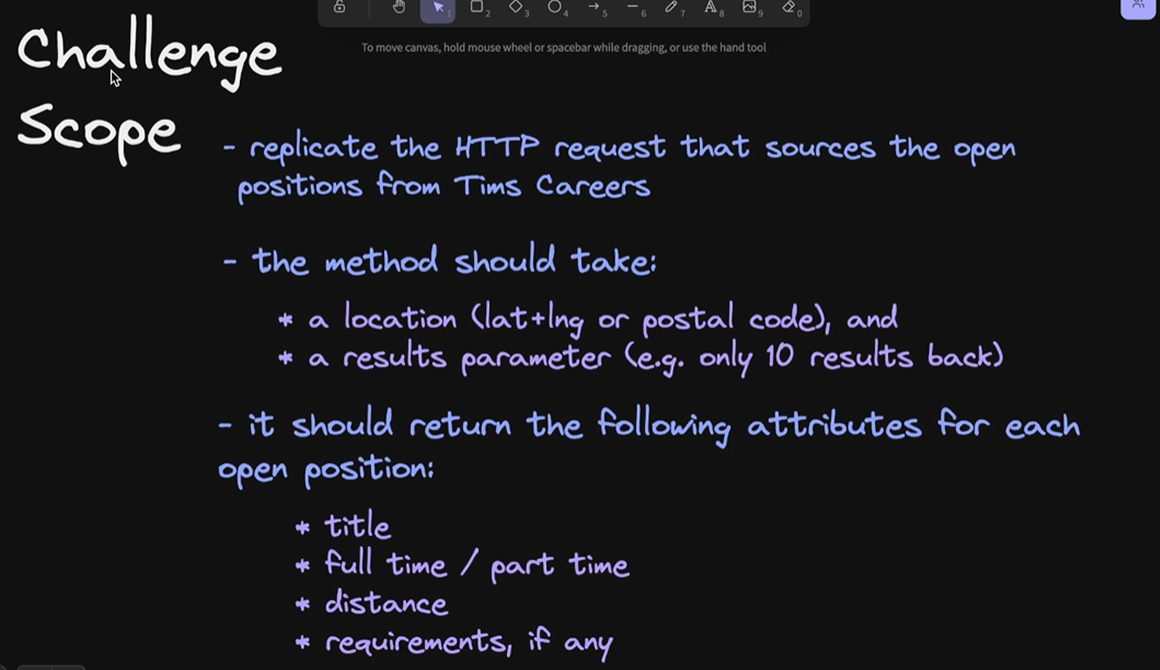

In [ ]:
!pip3 install pgeocode

In [ ]:
import pgeocode
import pandas as pd

In [ ]:
import requests

def get_jobs_for(lat,lng,results):

    if lat is None or lng is None:
        raise ValueError("Both lat and lng must be provided")

    url = f"https://api.higherme.com/classic/jobs?page=1&includes=location,location.company,location.externalServiceReferences&limit={results}&filters\\[brand.id\\]=58bd9e7f472bd&filters\\[lat\\]={lat}&filters\\[lng\\]={lng}&filters\\[distance\\]=3027306.81650747&sort\\[distance\\]=asc"

    payload = {}
    headers = {
    'accept': 'application/json, text/plain, */*',
    'accept-language': 'en-US,en-GB;q=0.9,en;q=0.8',
    'higherme-client-version': '2025.02.14_06.0b',
    'origin': 'https://app.higherme.com',
    'priority': 'u=1, i',
    'sec-ch-ua': '"Not(A:Brand";v="99", "Google Chrome";v="133", "Chromium";v="133"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/133.0.0.0 Safari/537.36'
    }

    # response = requests.request("GET", url, headers=headers, data=payload)
    response = requests.get(url, headers=headers, data=payload)

    response_data = response.json()

    df = pd.DataFrame(
    data=[r.get('attributes') for r in response_data.get('data')],
    columns=['title','full_time','part_time','requirements','distance']
    )

    return df


In [ ]:
nomi = pgeocode.Nominatim('ca')
lat = nomi.query_location('m5e').latitude
lng = nomi.query_location('m5e').longitude

response_data = get_jobs_for(lat,lng,results=5)
response_data

### What is selectolax?

A faster alternative to BeautifulSoup

In [ ]:
!pip3 install selectolax

In [ ]:
import requests as r
url = 'https://en.wikipedia.org/wiki/Rare-earth_element'

resp = r.get(url)

In [ ]:
from selectolax.parser import HTMLParser

tree = HTMLParser(resp.text)

In [ ]:
type(tree)

In [ ]:
tree.css('p')

In [ ]:
from random import choice

random_node = choice(tree.css('img'))
random_node, random_node.attributes

In [ ]:
random_node.html

In [ ]:
tree.css('p')[0], tree.css('p')[2].text() # by default, extracts text from childrens, descendants as well

In [ ]:
tree.css('p')[2].text(deep=False) # Now, it won't extract text from children, descendants

In [ ]:
tree.css('p')[2].html

### CSS Combinators

In [ ]:
# DESCENDENT Combinator (p .some_class) ((Notice the space between 'p' and '.') Means that all the tags that contains 'subclass' and are descendants of p)

'''
p.some_class returns 'p' tag containing 'some_class'
p .some_class returns all the descendent tags of 'p' that contains 'some_class'
'''

p_anchors = tree.css('p a') # Anchor descendants of p tag
p_anchors

In [ ]:
[n.attrs['href'] for n in p_anchors]

In [ ]:
# Child Combinator (>)
tree.css('p > a') # p>a not equal to p > a

In [ ]:
# Adjacent Sibling Combinator (+)
all_edits = tree.css('.mw-editsection-bracket + a')

In [ ]:
len(all_edits)

In [ ]:
set([e.parent.tag for e in all_edits])

In [ ]:
# General Sibling Combinator (~)
all_edits_gen = tree.css('span ~ a')
len(all_edits_gen)

In [ ]:
set([e.parent.tag for e in all_edits_gen])

### Selector Types

In [ ]:
# Simple
print(len(tree.css('span')))
print(len(tree.css('#firstHeading'))) # id selector
print(len(tree.css('.mw-editsection-bracket')))

In [ ]:
# Compound -> These selectors let us define set of simultaneous conditions that an element must satisfy in order to be selected
print(len(tree.css('p[class]'))) # selects 'p' (condition 1) that has some class (not any specific though) (condition 2)

In [ ]:
# Complex -> Combining Simple annd Compound selectors using a combinator
tree.css('a > img[src*="upload.wikimedia.org"]')

In [ ]:
# lists -> Sequence of selectors separated by ','. Purpose here is to target more than one selector at once
tree.css('a > img[src*="upload.wikimedia.org"], h1') # Gives combined (but independent) results for both selector outputs

### Project: Image Scraper (403 Error)

In [ ]:
!pip3 install httpx # Alternative to requests

In [ ]:
import requests
from httpx import get
from selectolax.parser import HTMLParser
import random

In [ ]:
# def get_img_tags_for(term='galaxy'):
#     url = f"https://unsplash.com/s/photos/{term}"
#     url = 'https://www.zillow.com'
#     # headers={"User-Agent": "Mozilla/5.0 (iPad; CPU OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148"}

#     # with httpx.Client() as client:
#     #     resp = client.get(url,headers)

#     user_agent_list = ['Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/133.0.0.0 Safari/537.36','Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/133.0.0.0 Safari/537.36','Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/133.0.0.0 Safari/537.36']
#     headers={"User-Agent": user_agent_list[random.randint(0, len(user_agent_list)-1)]}

#     resp = requests.get(url, headers=headers)
#     print(resp)

#     print(resp.status_code)

#     if resp.status_code!=200:
#         raise Exception("Error getting response")

#     tree = HTMLParser(resp.text)
#     imgs = tree.css('figure a img')

# get_img_tags_for()

In [ ]:
# import os
# from bs4 import BeautifulSoup
# import numpy as np
# import pandas as pd
# import regex as re
# import requests

# pd.set_option('display.max_rows', None)
# pd.set_option('mode.chained_assignment',None)

# headers = {
#     'authority': 'www.zillow.com',
#     'sec-ch-ua': '"Google Chrome";v="89", "Chromium";v="89", ";Not A Brand";v="99"',
#     'sec-ch-ua-mobile': '?0',
#     'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.114 Safari/537.36',
#     'accept': '*/*',
#     'sec-fetch-site': 'same-origin',
#     'sec-fetch-mode': 'cors',
#     'sec-fetch-dest': 'empty',
#     'referer': 'https://www.zillow.com/los-angeles-ca/2_p/?searchQueryState=%7B%22pagination%22%3A%7B%22currentPage%22%3A2%7D%2C%22usersSearchTerm%22%3A%22Los%20Angeles%22%2C%22mapBounds%22%3A%7B%22west%22%3A-118.88620504589845%2C%22east%22%3A-117.93726095410157%2C%22south%22%3A33.54554919445917%2C%22north%22%3A34.49481997322805%7D%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A12447%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%2C%22ah%22%3A%7B%22value%22%3Atrue%7D%7D%2C%22isListVisible%22%3Atrue%7D',
#     'accept-language': 'en-US,en;q=0.9',
# }

# with requests.session() as s:
#     city = 'los-angeles/'
#     page = 1
#     end_page = 10
#     url = ''
#     url_list = []

#     while page <= end_page:
#         url = 'https://www.zillow.com/homes/for_sale/' +city+ f'{page}_p/'
#         url_list.append(url)
#         page += 1

#     request = ''
#     request_list = []

#     for url in url_list:
#         request = s.get(url, headers=headers)
#         request_list.append(request)

# soup = ''
# soup_list = []

# for request in request_list:
#     soup = BeautifulSoup(request.content, 'html.parser')
#     soup_list.append(soup)



In [ ]:
# soup_list[1]

In [ ]:
# df_list = []
# for soup in soup_list:
#     df = pd.DataFrame()
#     for i in soup:
#         address = soup.find_all (class_= 'list-card-addr')
#         price = list(soup.find_all (class_='list-card-price'))
#         beds = list(soup.find_all("ul", class_="list-card-details"))
#         details = soup.find_all ('div', {'class': 'list-card-details'})
#         home_type = soup.find_all ('div', {'class': 'list-card-footer'})
#         last_updated = soup.find_all ('div', {'class': 'list-card-top'})
#         brokerage = list(soup.find_all(class_= 'list-card-brokerage list-card-img-overlay'))
#         link = soup.find_all (class_= 'list-card-link')

#         df['prices'] = price
#         df['address'] = address
#         df['beds'] = beds

#     urls = []

#     for link in soup.find_all("article"):
#         href = link.find('a',class_="list-card-link")
#         addresses = href.find('address')
#         addresses.extract()
#         urls.append(href)

#     df['links'] = urls
#     df['links'] = df['links'].astype('str')
#     df['links'] = df['links'].replace('<a class="list-card-link list-card-link-top-margin" href="', ' ', regex=True)
#     df['links'] = df['links'].replace('" tabindex="0"></a>', ' ', regex=True)
#     df_list.append(df)

In [ ]:
# df_list

### Tackling JavaScript with Microsoft PlayWright


We will be using it as a headless browser in the context of rendering JavaScript

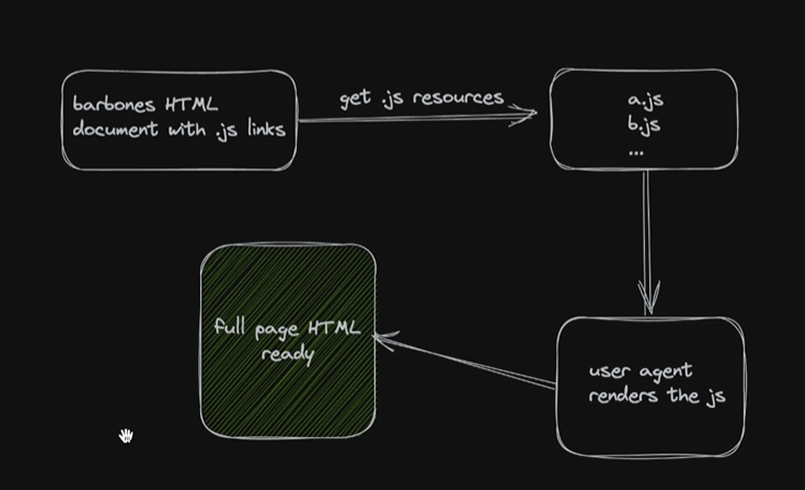

In [ ]:
!pip3 install selectolax playwright requests beautifulsoup4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 MB 11.8 MB/s eta 0:00:00


In [ ]:
!playwright install

163.5 MiB [] 0% 124.4s163.5 MiB [] 0% 38.6s163.5 MiB [] 0% 34.1s163.5 MiB [] 0% 20.9s163.5 MiB [] 0% 9.9s163.5 MiB [] 0% 11.3s163.5 MiB [] 1% 8.5s163.5 MiB [] 1% 7.3s163.5 MiB [] 1% 7.2s163.5 MiB [] 2% 6.6s163.5 MiB [] 2% 6.7s163.5 MiB [] 3% 6.2s163.5 MiB [] 3% 6.0s163.5 MiB [] 4% 5.6s163.5 MiB [] 4% 5.2s163.5 MiB [] 5% 4.9s163.5 MiB [] 5% 4.8s163.5 MiB [] 6% 4.7s163.5 MiB [] 6% 4.9s163.5 MiB [] 7% 4.9s163.5 MiB [] 7% 4.8s163.5 MiB [] 8% 4.7s163.5 MiB [] 8% 4.6s163.5 MiB [] 9% 4.4s163.5 MiB [] 10% 4.3s163.5 MiB [] 10% 4.2s163.5 MiB [] 10% 4.3s163.5 MiB [] 11% 4.3s163.5 MiB [] 12% 4.2s163.5 MiB [] 13% 4.2s163.5 MiB [] 13% 4.1s163.5 MiB [] 13% 4.2s163.5 MiB [] 14% 4.1s163.5 MiB [] 15% 4.1s163.5 MiB [] 15% 4.2s163.5 MiB [] 16% 4.1s163.5 MiB [] 17% 4.1s163.5 MiB [] 17% 4.0s163.5 MiB [] 18% 4.0s163.5 MiB [] 18% 3.9s163.5 MiB [] 19% 3.8s163.5 MiB [] 20% 3.7s163.5 MiB [] 20% 3.6s163.5 MiB [] 21% 3.5s163.5 MiB [] 22% 3.4s163.5 MiB [] 23% 3.4s163.5 MiB [] 24% 3.3s163.5 MiB [] 25% 3.2s163.5 MiB 

In [ ]:
# import asyncio
# from playwright.async_api import async_playwright
# from selectolax.parser import HTMLParser

# async def extract_full_body_html(url):
#     async with async_playwright() as p:
#         browser = await p.chromium.launch(headless=True) # User Agent is Chromium
#         page = await browser.new_page()
#         await page.goto(url)

#     TIMEOUT = 90000
#     # await page.wait_for_load_state('networkidle', timeout=TIMEOUT) # Stay on the page till network is idle for timeout period
#     # await page.wait_for_selector('div.visualization-section_data', timeout=TIMEOUT) # Stay on the page till this selector is visible

#     content = await page.inner_html('body')  # Get body content
#     await browser.close()
#     return content


# def extract_budget(html):
#     tree = HTMLParser(html)
#     budget_div = tree.css_first('div.visualization-section_data')
#     return budget_div.text if budget_div else "No budget data found"

In [ ]:
# url = 'https://www.usaspending.gov/agency/department-of-defense?fy=2023'
# # html = asyncio.run(extract_full_body_html(url))
# # print(extract_budget(html))

# # Running inside Jupyter Notebook
# async def main():
#     html = await extract_full_body_html(url)
#     print(extract_budget(html))

# # Run the async function properly
# await main()

In [ ]:
import asyncio
from playwright.async_api import async_playwright
from selectolax.parser import HTMLParser

async def extract_full_body_html(url):
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True)  # Start browser
        page = await browser.new_page()
        await page.goto(url)

        TIMEOUT = 9000
        await page.wait_for_load_state('networkidle', timeout=TIMEOUT)  # Ensure page loads fully
        await page.wait_for_selector('div.visualization-section__data', timeout=TIMEOUT)  # Wait for required element

        content = await page.inner_html('body')  # Fetch page content

        # Keep browser open until content is retrieved
        await asyncio.sleep(2)  # Small delay to ensure stability

        await browser.close()  # Close browser only after retrieving data
        return content

def extract_budget(html):
    tree = HTMLParser(html)
    budget_div = tree.css_first('div.visualization-section__data')
    return budget_div.text() if budget_div else "No budget data found"

# URL to scrape
url = 'https://www.usaspending.gov/agency/department-of-defense?fy=2023'

# Running inside Jupyter Notebook
async def main():
    html = await extract_full_body_html(url)
    print(extract_budget(html))

# Run the async function properly
await main()


$1.52 Trillionin budgetary resources
